<font size=8><center> Baseline Model </center></font>

The target is to create a simple baseline model and run it on the given data.

# The Dataset

In [1]:
#Code for converting .jpg images to .jpeg
from PIL import Image
import os
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"
    
    # Iterate through the directory and convert images
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                # Load the image
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                
                # Convert the image to RGB mode
                img = img.convert("RGB")
                
                # Define the new file path with the .jpeg extension
                new_img_path = os.path.splitext(img_path)[0] + ".jpeg"
                
                # Save the image in JPEG format
                img.save(new_img_path, "JPEG")
                
                # Close the image to free resources
                img.close()
    
    print("Image format conversion complete.")

Image format conversion complete.
Image format conversion complete.
Image format conversion complete.
Image format conversion complete.
Image format conversion complete.
Image format conversion complete.


In [2]:
# Define the directory path
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']
for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"
    
    # Iterate through the directory and delete JPG files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")
    
    print("Deletion complete.")

Deletion complete.
Deletion complete.
Deletion complete.
Deletion complete.
Deletion complete.
Deletion complete.


In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 1
train_data_dir = "raw_data/training-data/"
test_data_dir = "raw_data/test-data/"
# We define a train set
train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(150, 150),
  batch_size=batch_size)
# We define a second one for the test data
val_ds = image_dataset_from_directory(
  test_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(150, 150),
  batch_size=batch_size)

2023-08-28 15:48:50.404579: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-28 15:48:50.409724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 15:48:50.507426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 15:48:50.509152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 15:48:51.458034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Found 636 files belonging to 6 classes.
Found 268 files belonging to 6 classes.


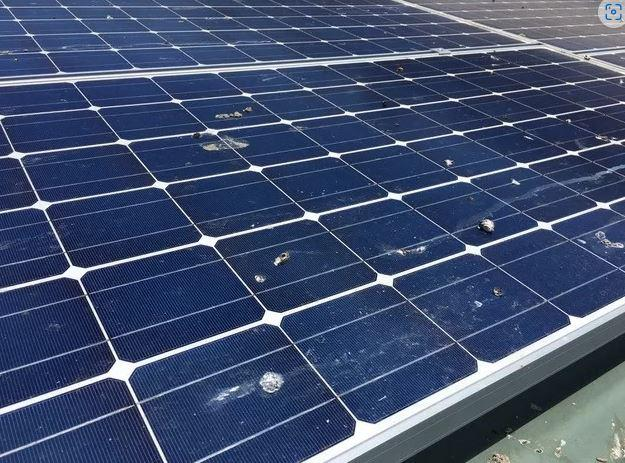

In [4]:
# Let´s see a picture
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}bird/Bird (1).jpeg")
img

In [5]:
# Have a look at the different classes
train_ds.class_names

['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']

In [6]:
img_to_array(img).shape

(463, 625, 3)

# First Model

In [7]:
from tensorflow.keras import models, layers, Sequential

In [8]:
def initialize_baseline_model():
    model = Sequential()

    model.add(layers.Rescaling(1./255, input_shape = (150, 150, 3)))
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )
    
    
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )
    
    
    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )
    
    model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )
    
    model.add(layers.Flatten())
    
    # Here we flatten our data to end up with just one dimension
    
    model.add(layers.Dense(64, activation="relu"))
    
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(6, activation="softmax"))

    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [9]:
model = initialize_baseline_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        1

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[EarlyStopping(patience=2)])

Epoch 1/10
636/636 [==============================] - 11s 17ms/step - loss: 1.7812 - accuracy: 0.2610 - val_loss: 1.6576 - val_accuracy: 0.2985
Epoch 2/10
636/636 [==============================] - 10s 16ms/step - loss: 1.6892 - accuracy: 0.3318 - val_loss: 1.5411 - val_accuracy: 0.4403
Epoch 3/10
636/636 [==============================] - 10s 16ms/step - loss: 1.6758 - accuracy: 0.3726 - val_loss: 1.5222 - val_accuracy: 0.3955
Epoch 4/10
636/636 [==============================] - 11s 18ms/step - loss: 1.6063 - accuracy: 0.3742 - val_loss: 1.4542 - val_accuracy: 0.4403
Epoch 5/10
636/636 [==============================] - 13s 20ms/step - loss: 1.5387 - accuracy: 0.4182 - val_loss: 1.4279 - val_accuracy: 0.4366
Epoch 6/10
636/636 [==============================] - 13s 20ms/step - loss: 1.4473 - accuracy: 0.4827 - val_loss: 1.4781 - val_accuracy: 0.4515
Epoch 7/10
636/636 [==============================] - 13s 21ms/step - loss: 1.3973 - accuracy: 0.5267 - val_loss: 1.4155 - val_accuracy:

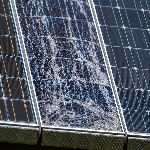

In [12]:
# Get a test picture
new_test = load_img("raw_data/new-test-set/test.jpeg", target_size=(150,150), interpolation="nearest")
new_test

In [18]:
img_array = img_to_array(new_test)
img_array = img_array.reshape((1, 150, 150, 3))
img_array.shape

(1, 150, 150, 3)

In [19]:
model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


array([[0.4561977 , 0.03705997, 0.08261635, 0.01517281, 0.03233521,
        0.37661803]], dtype=float32)

In [20]:
train_ds.class_names

['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']